# Import necessary libraries

In [36]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder


# Set plot styles
sns.set(style='whitegrid')

In [37]:
file_path = '/Users/mishka/Documents/GitHub/Sixth/Raw Data/Telco_customer_churn.xlsx'

In [38]:
# Read the Excel file
try:
    data = pd.read_excel(file_path)
    print("File read successfully as an Excel file.")
    
    # Check the shape of your data
    data_shape = data.shape
    print("Shape of the data:", data_shape)
    
    # Display the first few rows of the data
    print(data.head(10))
    
except FileNotFoundError:
    print(f"The file at {file_path} was not found. Please check the file path and try again.")
except Exception as e:
    print(f"An unexpected error occurred while reading the file: {e}")

File read successfully as an Excel file.
Shape of the data: (7043, 33)
   CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   
5  4190-MFLUW      1  United States  California  Los Angeles     90020   
6  8779-QRDMV      1  United States  California  Los Angeles     90022   
7  1066-JKSGK      1  United States  California  Los Angeles     90024   
8  6467-CHFZW      1  United States  California  Los Angeles     90028   
9  8665-UTDHZ      1  United States  California  Los Angeles     90029   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964

In [39]:
data.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

## Data Cleaning

In [40]:
# Check for missing values
print(data.isnull().sum())


CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64


In [41]:
# Data types and basic info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

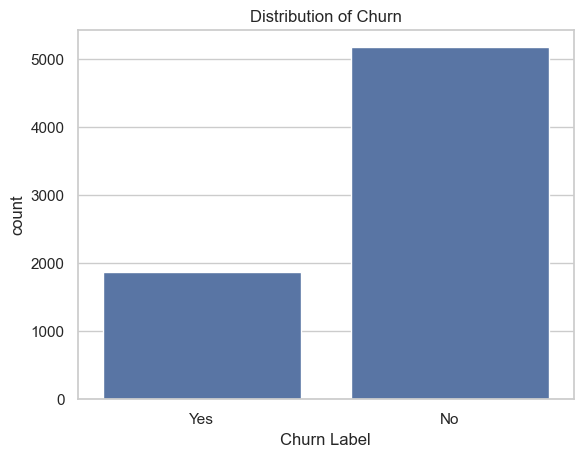

In [42]:
# Distribution of the target variable
sns.countplot(x='Churn Label', data=data)
plt.title('Distribution of Churn')
plt.show()


In [43]:
# Summary statistics
print(data.describe())

        Count      Zip Code     Latitude    Longitude  Tenure Months  \
count  7043.0   7043.000000  7043.000000  7043.000000    7043.000000   
mean      1.0  93521.964646    36.282441  -119.798880      32.371149   
std       0.0   1865.794555     2.455723     2.157889      24.559481   
min       1.0  90001.000000    32.555828  -124.301372       0.000000   
25%       1.0  92102.000000    34.030915  -121.815412       9.000000   
50%       1.0  93552.000000    36.391777  -119.730885      29.000000   
75%       1.0  95351.000000    38.224869  -118.043237      55.000000   
max       1.0  96161.000000    41.962127  -114.192901      72.000000   

       Monthly Charges  Churn Value  Churn Score         CLTV  
count      7043.000000  7043.000000  7043.000000  7043.000000  
mean         64.761692     0.265370    58.699418  4400.295755  
std          30.090047     0.441561    21.525131  1183.057152  
min          18.250000     0.000000     5.000000  2003.000000  
25%          35.500000     0.00

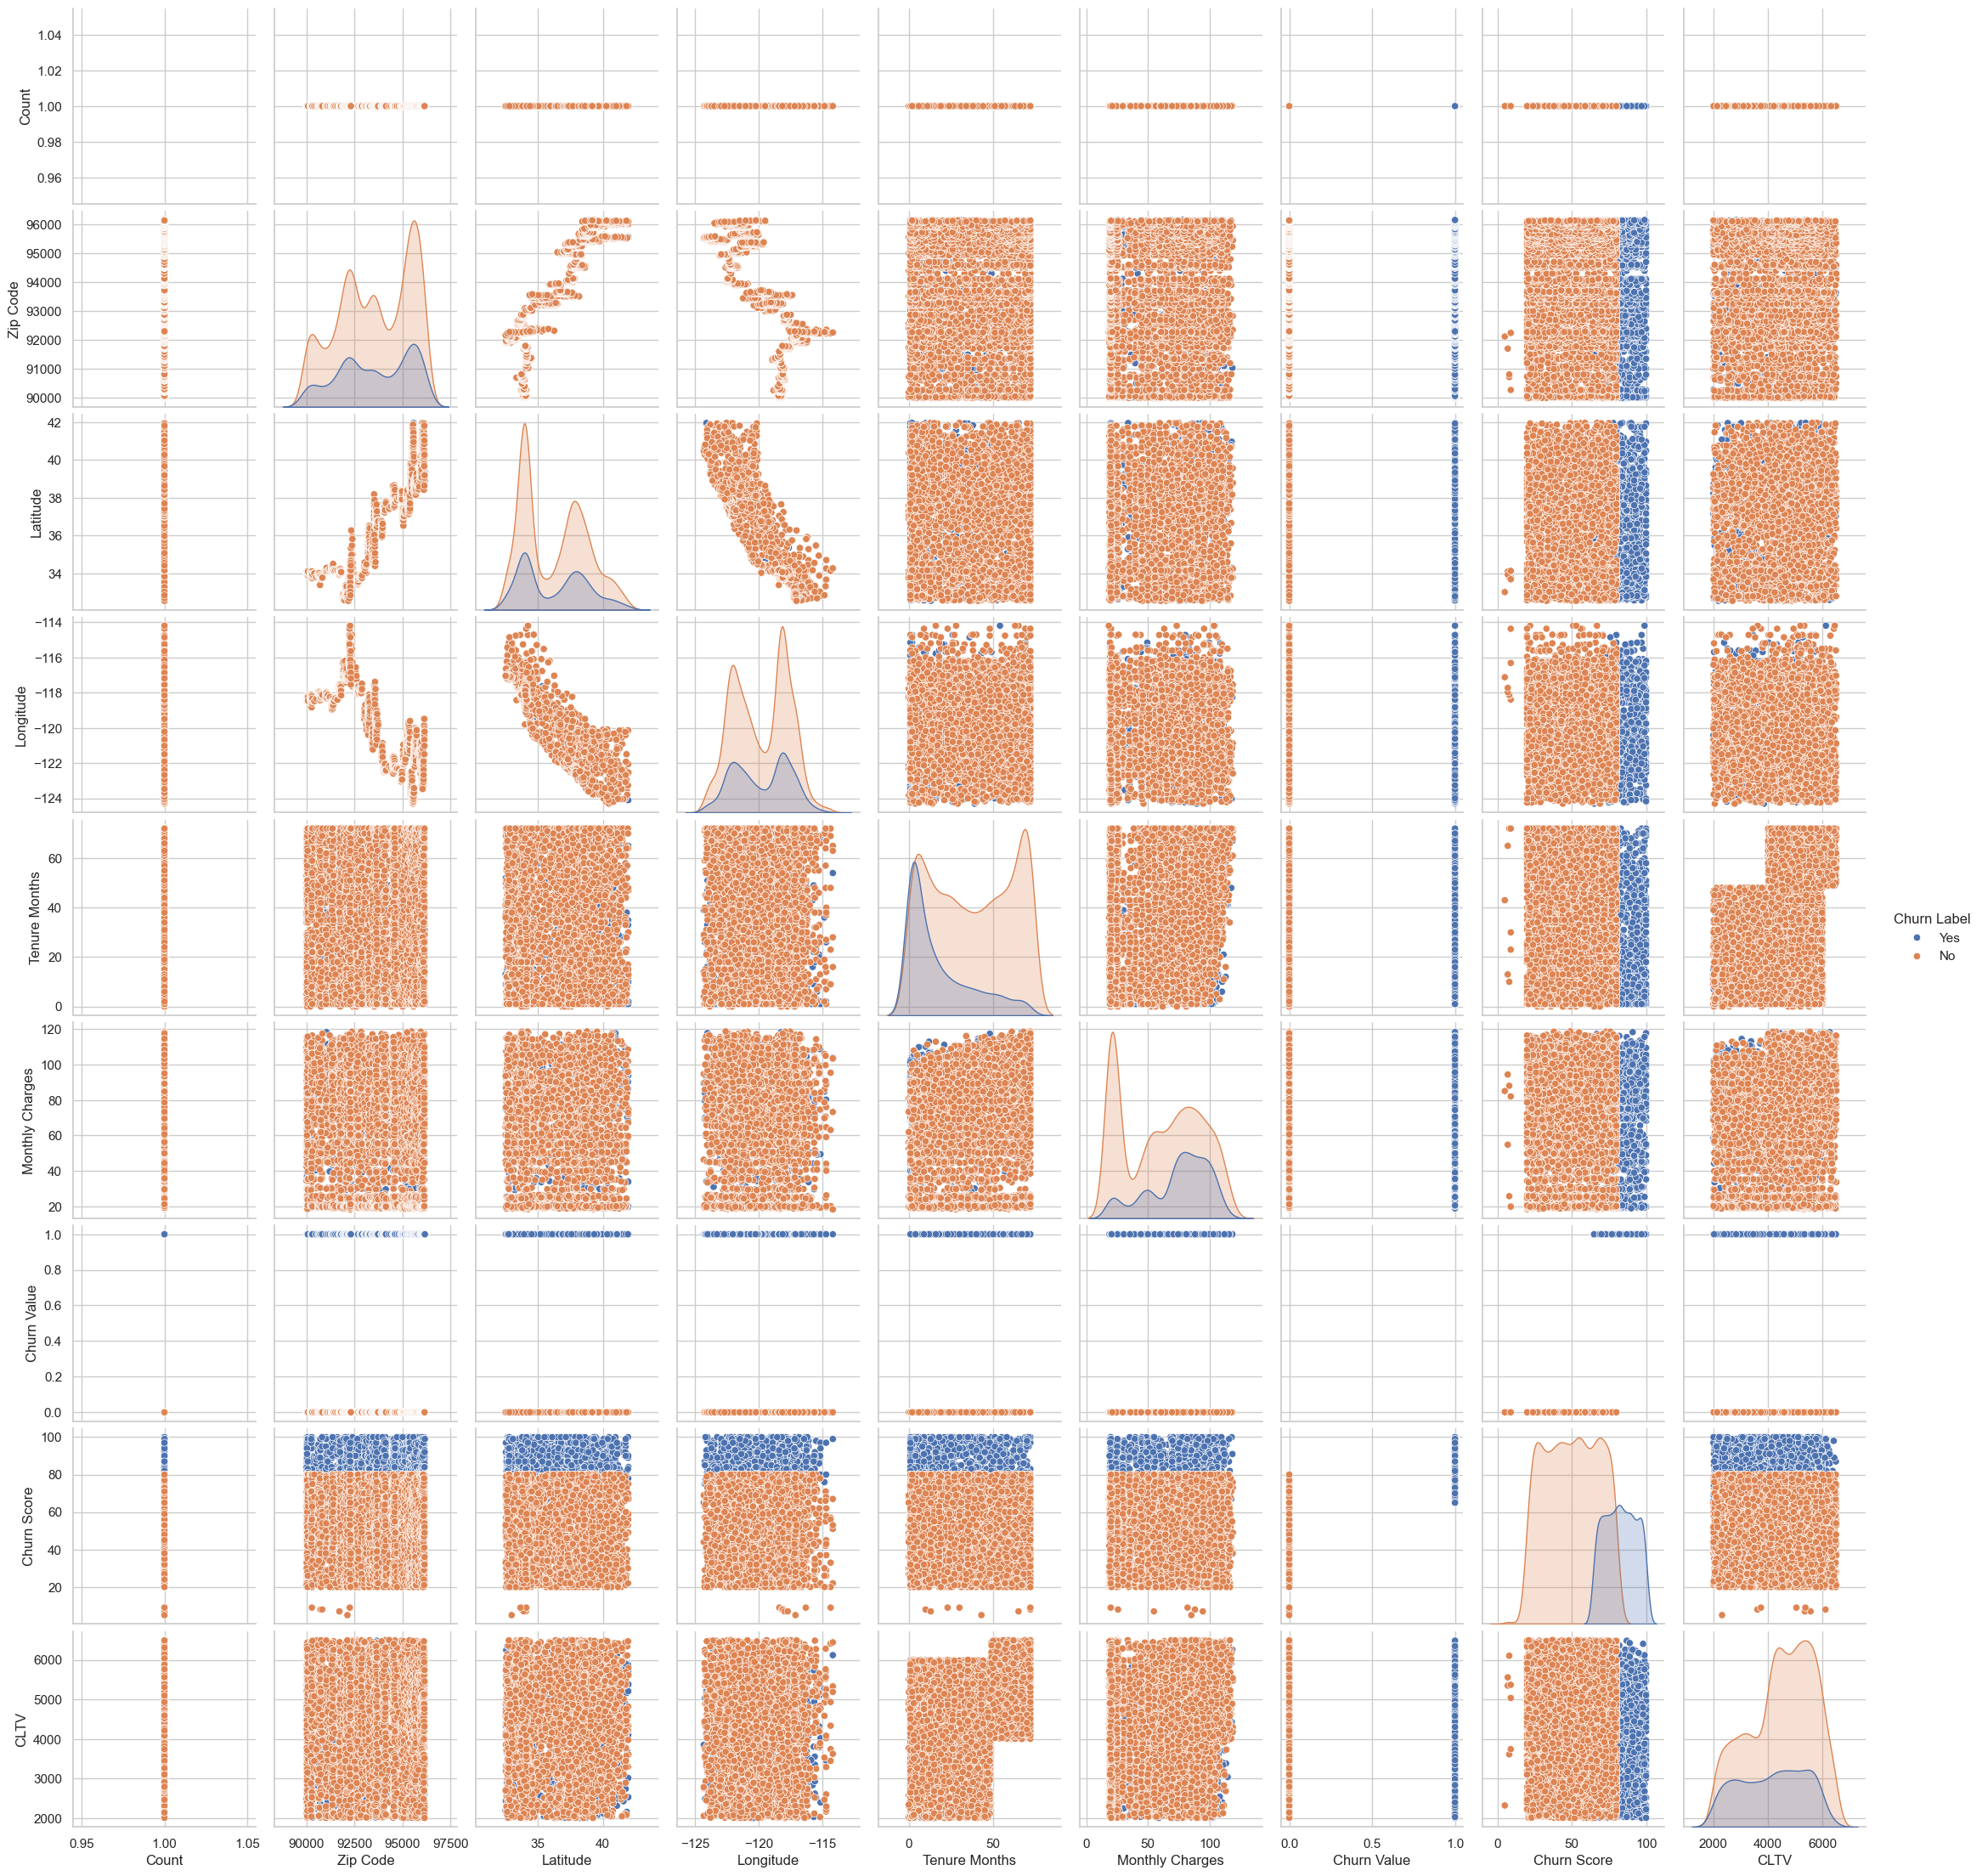

In [44]:
# Pairplot to visualize relationships
sns.pairplot(data, hue='Churn Label', diag_kind='kde')
plt.show()

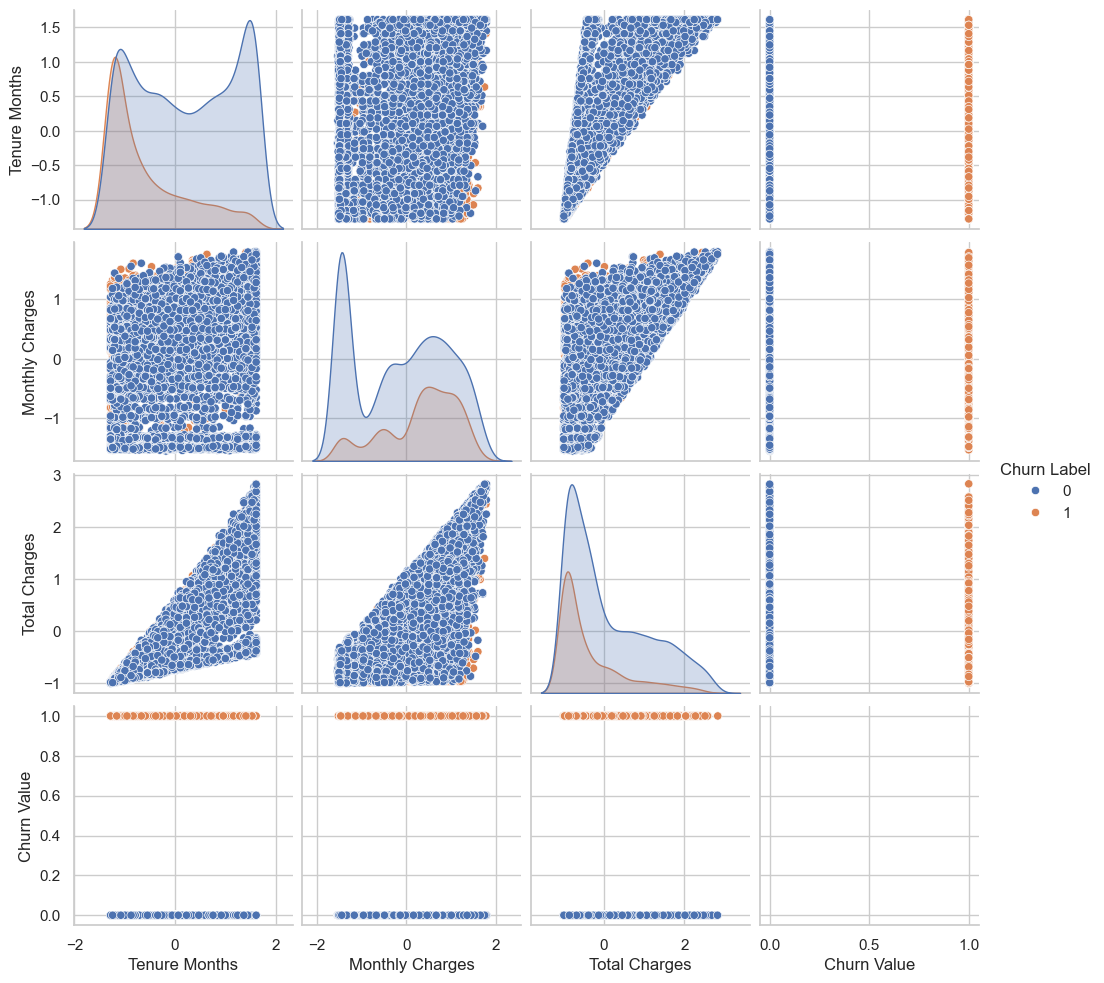

In [72]:
# Simplify the pairplot to focus on key features
key_features = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value']
sns.pairplot(data[key_features + ['Churn Label']], hue='Churn Label', diag_kind='kde')
plt.show()

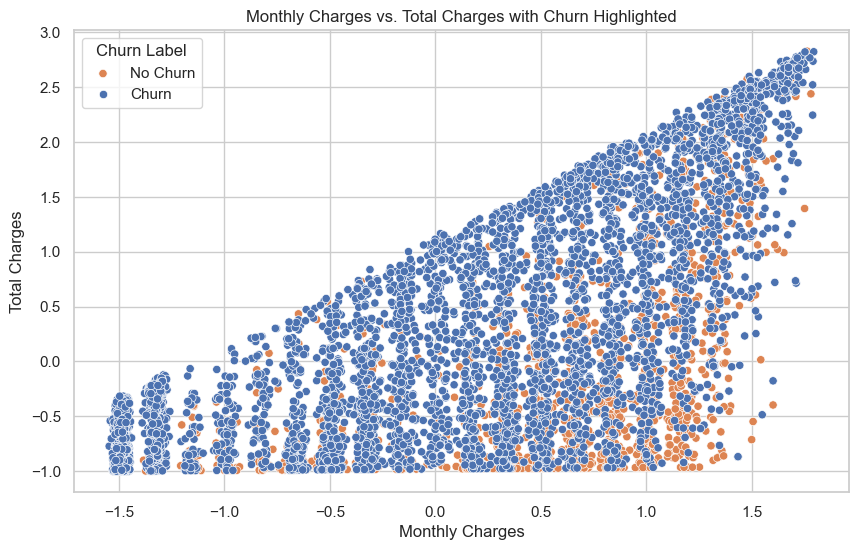

In [85]:
# Plot to highlight relationship between Monthly Charges and Churn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Monthly Charges', y='Total Charges', hue='Churn Label', data=data)
plt.title('Monthly Charges vs. Total Charges with Churn Highlighted')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.annotate('High Churn Rate', xy=(80, 5000), xytext=(100, 6000),
             arrowprops=dict(facecolor='red', shrink=0.05))
plt.legend(title='Churn Label', loc='upper left', labels=['No Churn', 'Churn'])
plt.show()

## Plot description for "Tenure Months Distribution for Churn and Non-Churn Customers"


This plot shows the distribution of the tenure (in months) of customers who churned (left the service) and those who did not.
 It helps to visualize the relationship between how long a customer has been with the service and their likelihood of leaving.

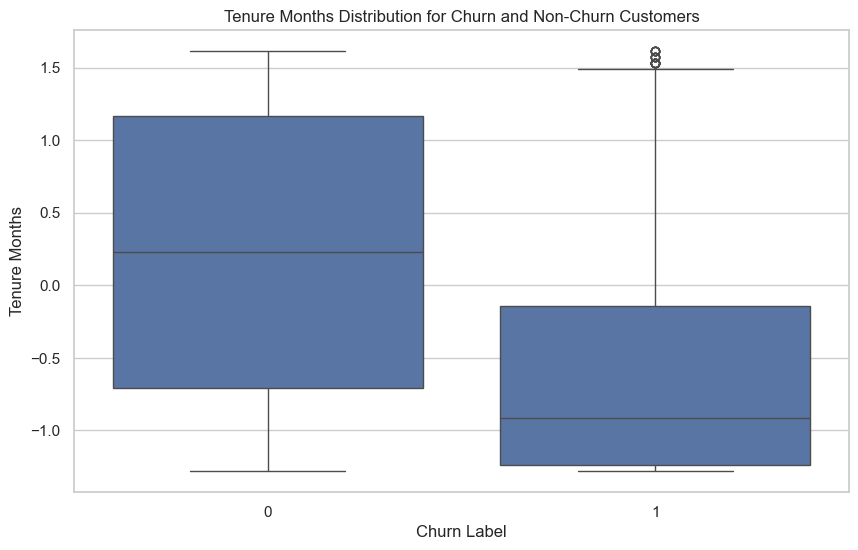

In [77]:
# Plot to highlight relationship between Tenure and Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn Label', y='Tenure Months', data=data)
plt.title('Tenure Months Distribution for Churn and Non-Churn Customers')
plt.xlabel('Churn Label')
plt.ylabel('Tenure Months')
plt.annotate('Low Tenure, High Churn', xy=(1, 10), xytext=(1.5, 20),
             arrowprops=dict(facecolor='blue', shrink=0.05))
plt.show()


### Plot describtion for relationship between Tenure and Churn



This plot shows how long customers have been with the company (tenure months) and whether they have canceled (churn label).

 The boxes show the distribution of the length of stay for both groups: Customers who have churned (1), and customers who have not churned (0). 
 
 The note "Low tenure, high churn" indicates that customers who have been with the company for a shorter period of time are more likely to quit.

### Plot beschreibung für die Beziehung zwischen Betriebszugehörigkeit und Abwanderung

Dieser Plot zeigt, wie lange Kunden beim Unternehmen sind (Tenure Months) und ob sie gekündigt haben (Churn Label).

 Die Boxen zeigen die Verteilung der Verweildauer für beide Gruppen: Kunden, die gekündigt haben (1), und Kunden, die nicht gekündigt haben (0). 
 
 Die Anmerkung "Low Tenure, High Churn" weist darauf hin, dass Kunden, die kürzer beim Unternehmen sind, eher kündigen.

## Plot description for "Contract Type vs. Churn"
This plot compares the contract types (Month-to-month, One year, Two year) and their respective churn rates. It helps to identify which contract types are more prone to customer churn.



Dieser Plot zeigt, wie die Art des Vertrags (Contract Type) die Kündigungsrate beeinflusst. 
Kunden mit Monat-zu-Monat-Verträgen (Month-to-month) haben eine höhere Kündigungsrate im Vergleich zu Kunden mit längeren Vertragslaufzeiten (Ein-Jahres- oder Zwei-Jahres-Verträge).

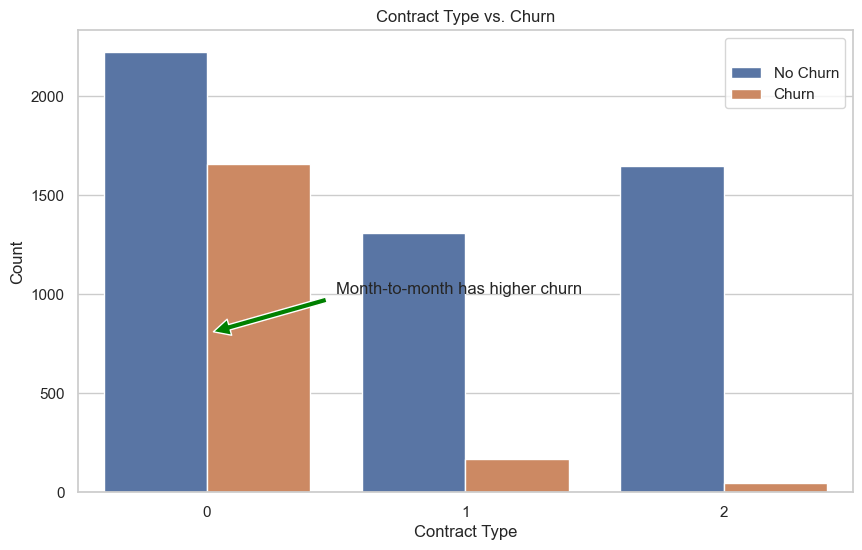

In [79]:
# Plot to highlight impact of Contract Type on Churn
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn Label', data=data)
plt.title('Contract Type vs. Churn')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.annotate('Month-to-month has higher churn', xy=(0, 800), xytext=(0.5, 1000),
             arrowprops=dict(facecolor='green', shrink=0.05))

# Make churn labels more visible
plt.legend(title=' ', loc='upper right', labels=['No Churn', 'Churn'])
plt.show()


## Plot description for "Monthly Charges vs. Total Charges with Churn Highlighted"

This scatter plot shows the relationship between monthly charges and total charges, with churn status highlighted.

 It helps to see if there is a pattern in the charges that correlates with customer churn.

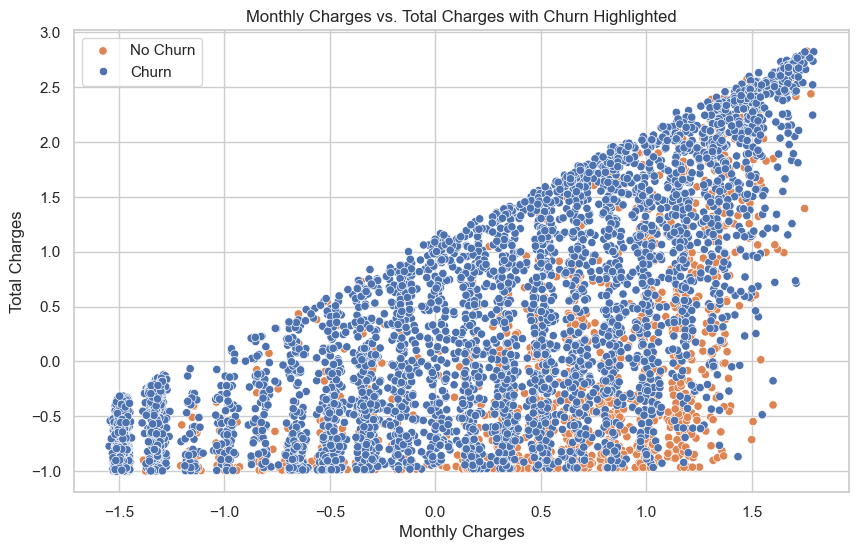

In [84]:
# Plot to highlight relationship between Monthly Charges and Churn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Monthly Charges', y='Total Charges', hue='Churn Label', data=data)
plt.title('Monthly Charges vs. Total Charges with Churn Highlighted')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.annotate('High Churn Rate', xy=(80, 5000), xytext=(100, 6000),
             arrowprops=dict(facecolor='red', shrink=0.05))

# Make churn labels more visible
plt.legend(title='', loc='upper left', labels=['No Churn', 'Churn'])
plt.show()

###  Plot to highlight impact of Contract Type on Churn

This plot shows how the type of contract influences the churn rate. 
Customers with month-to-month contracts have a higher churn rate compared to customers with longer contract terms (one-year or two-year contracts).


Dieser Plot zeigt, wie die Art des Vertrags (Contract Type) die Kündigungsrate beeinflusst. 
Kunden mit Monat-zu-Monat-Verträgen (Month-to-month) haben eine höhere Kündigungsrate im Vergleich zu Kunden mit längeren Vertragslaufzeiten (Ein-Jahres- oder Zwei-Jahres-Verträge).

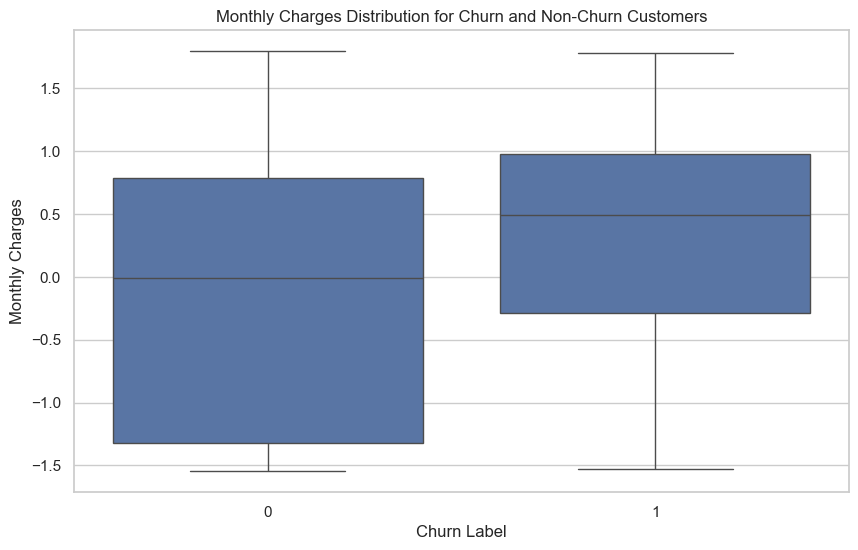

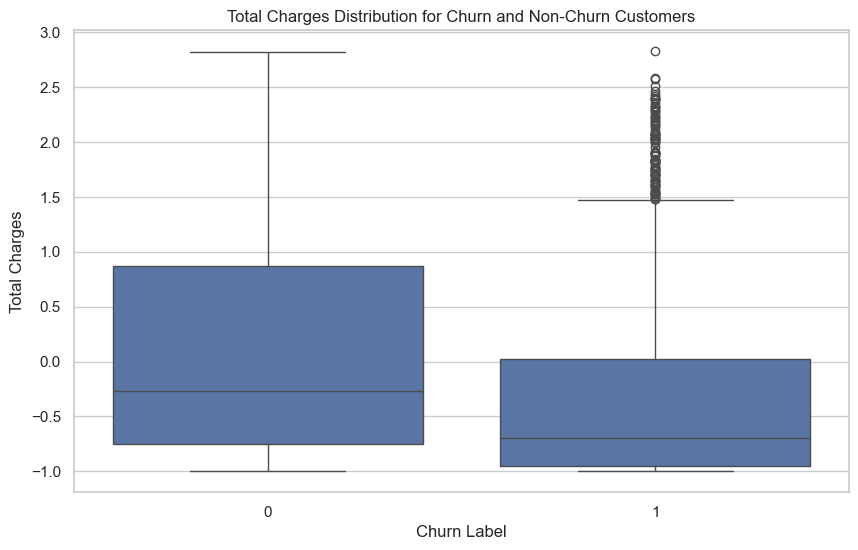

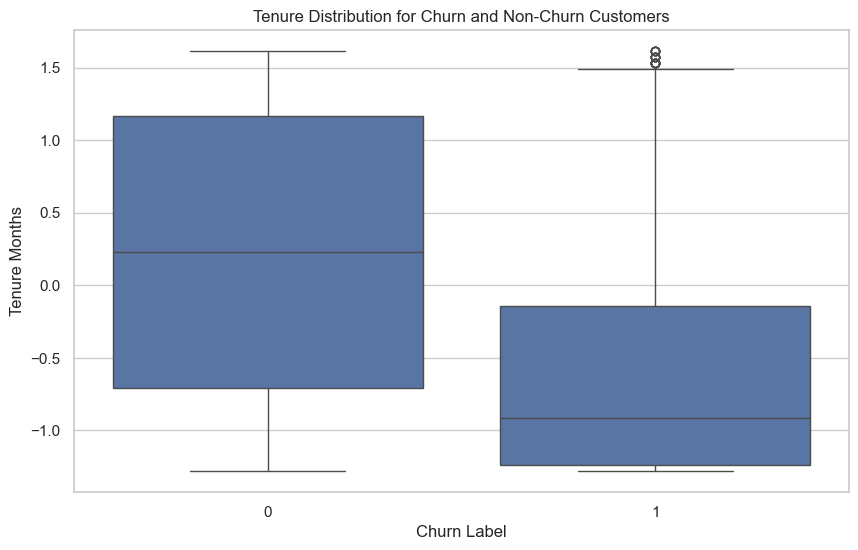

In [76]:
# Plot 1: Monthly Charges vs. Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn Label', y='Monthly Charges', data=data)
plt.title('Monthly Charges Distribution for Churn and Non-Churn Customers')
plt.xlabel('Churn Label')
plt.ylabel('Monthly Charges')
plt.show()

# Plot 2: Total Charges vs. Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn Label', y='Total Charges', data=data)
plt.title('Total Charges Distribution for Churn and Non-Churn Customers')
plt.xlabel('Churn Label')
plt.ylabel('Total Charges')
plt.show()

# Plot 3: Tenure vs. Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn Label', y='Tenure Months', data=data)
plt.title('Tenure Distribution for Churn and Non-Churn Customers')
plt.xlabel('Churn Label')
plt.ylabel('Tenure Months')
plt.show()


## Data Cleaning and Feature Engineering

In [45]:
# Handling missing values
data['Total Charges'] = pd.to_numeric(data['Total Charges'], errors='coerce')


In [46]:
# Separate numerical and categorical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = data.select_dtypes(include=[object]).columns.tolist()



In [47]:
# ##Right here - Fill missing values for numerical columns with median
imputer_num = SimpleImputer(strategy='median')
data[numerical_columns] = imputer_num.fit_transform(data[numerical_columns])


In [48]:
# Encoding categorical variables
le = LabelEncoder()
for column in categorical_columns:
    if column not in ['CustomerID', 'Churn Reason']:
        data[column] = le.fit_transform(data[column])


In [49]:
# Feature engineering
# Prevent division by zero by replacing zeroes with NaN in 'Tenure Months'
data['Tenure Months'].replace(0, np.nan, inplace=True)
data['TotalCharges_per_Month'] = data['Total Charges'] / data['Tenure Months']


In [50]:
## ##Right here - Replace infinite values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# ##Right here - Impute remaining missing values
data[numerical_columns] = imputer_num.fit_transform(data[numerical_columns])


In [51]:
# Normalize numerical features
scaler = StandardScaler()
numerical_features = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'TotalCharges_per_Month']
data[numerical_features] = scaler.fit_transform(data[numerical_features])


In [52]:
# Dropping unnecessary columns
data.drop(['CustomerID', 'Churn Reason'], axis=1, inplace=True)


In [53]:
#Right here - Ensure no NaN values remain in the data
print(data.isnull().sum())

Count                      0
Country                    0
State                      0
City                       0
Zip Code                   0
Lat Long                   0
Latitude                   0
Longitude                  0
Gender                     0
Senior Citizen             0
Partner                    0
Dependents                 0
Tenure Months              0
Phone Service              0
Multiple Lines             0
Internet Service           0
Online Security            0
Online Backup              0
Device Protection          0
Tech Support               0
Streaming TV               0
Streaming Movies           0
Contract                   0
Paperless Billing          0
Payment Method             0
Monthly Charges            0
Total Charges              0
Churn Label                0
Churn Value                0
Churn Score                0
CLTV                       0
TotalCharges_per_Month    11
dtype: int64


##  Preparing Data for Modeling

In [65]:
# Define features and target variable
X = data.drop(['Churn Label', 'Churn Value'], axis=1)
y = data['Churn Value']

# ##here - Check for any remaining NaN values in X and y
print("NaN values in X: ", X.isnull().sum().sum())
print("NaN values in y: ", y.isnull().sum())



NaN values in X:  11
NaN values in y:  0


In [66]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ##here - Check for any NaN values in the split data
print("NaN values in X_train: ", X_train.isnull().sum().sum())
print("NaN values in X_test: ", X_test.isnull().sum().sum())
print("NaN values in y_train: ", y_train.isnull().sum())
print("NaN values in y_test: ", y_test.isnull().sum())


NaN values in X_train:  11
NaN values in X_test:  0
NaN values in y_train:  0
NaN values in y_test:  0


In [67]:
# ##here - Impute missing values in X_train and X_test
X_train = imputer_num.fit_transform(X_train)
X_test = imputer_num.transform(X_test)

# ##here - Ensure no NaN values remain in the imputed data
print("NaN values in X_train after imputation: ", np.isnan(X_train).sum())
print("NaN values in X_test after imputation: ", np.isnan(X_test).sum())

NaN values in X_train after imputation:  0
NaN values in X_test after imputation:  0


##  Model Development and Initial Tuning

In [68]:
# Initial model with RandomForest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
print("Random Forest Model")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Random Forest Model
Accuracy: 0.9276082327892122
[[972  37]
 [ 65 335]]
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      1009
         1.0       0.90      0.84      0.87       400

    accuracy                           0.93      1409
   macro avg       0.92      0.90      0.91      1409
weighted avg       0.93      0.93      0.93      1409



## Advanced Modeling and Hyperparameter Tuning

In [69]:
# Gradient Boosting Model
gb_model = GradientBoostingClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 4, 5]
}

In [70]:
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)


In [71]:
# Ensure the input data does not contain NaN values before fitting
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   2.8s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   2.8s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   2.9s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   6.1s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   4.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   6.3s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   6.3s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   3.9s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   3.9s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   4.7s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=200; total time=   7.5s
[CV] END ...learning_rate=0.1, max_depth=4, n_es

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200]},
             verbose=2)